In [1]:
# Tavoitteena tässä on luoda aikasarjamalli Ariman avulla.
# Mallissa hyödynnetty lähteenä An End-to-End Project on Time Series Analysis and Forecasting with Python
# https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b
# Tuodaan kirjastot

import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
# Tuodaan data
df = pd.read_excel('Saapuneet puhelut viikkotasolla.xlsx', index_col='Date')
df.tail()

,Saapuneet
Date,
2021-02-14,3353
2021-02-21,7303
2021-02-28,4699
2021-03-07,4666
2021-03-14,3681


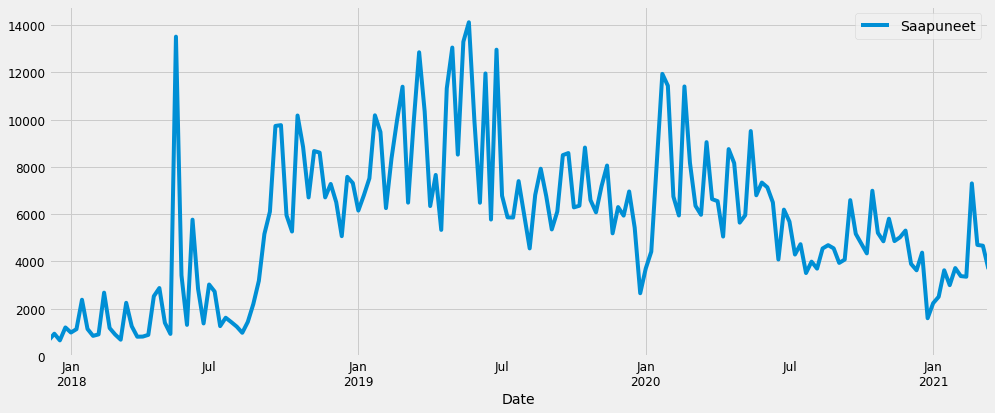

In [3]:
# Visualisoidaan aikasarjadataa
df.plot(figsize=(15, 6))
plt.show()

In [4]:
# Jokaiselle kuukaudelle keskiarvo
y = df['Saapuneet'].resample('M').mean()

In [5]:
# Katsotaan data läpi
y['2017':]

Date
2017-12-31      867.00
2018-01-31     1411.25
2018-02-28     1405.25
2018-03-31     1275.25
2018-04-30     1585.40
2018-05-31     4815.00
2018-06-30     2825.00
2018-07-31     2012.60
2018-08-31     1464.75
2018-09-30     6789.80
2018-10-31     7562.25
2018-11-30     7674.75
2018-12-31     6750.60
2019-01-31     7664.50
2019-02-28     8517.50
2019-03-31    10189.00
2019-04-30     7666.75
2019-05-31    12249.50
2019-06-30     9426.00
2019-07-31     6476.75
2019-08-31     6313.50
2019-09-30     7063.00
2019-10-31     7016.50
2019-11-30     6628.00
2019-12-31     5457.20
2020-01-31     7059.75
2020-02-29     8884.75
2020-03-31     7237.00
2020-04-30     7130.50
2020-05-31     7051.20
2020-06-30     5977.75
2020-07-31     4554.50
2020-08-31     4296.00
2020-09-30     4944.75
2020-10-31     5323.50
2020-11-30     5170.20
2020-12-31     3372.75
2021-01-31     3015.80
2021-02-28     4683.75
2021-03-31     4173.50
Freq: M, Name: Saapuneet, dtype: float64

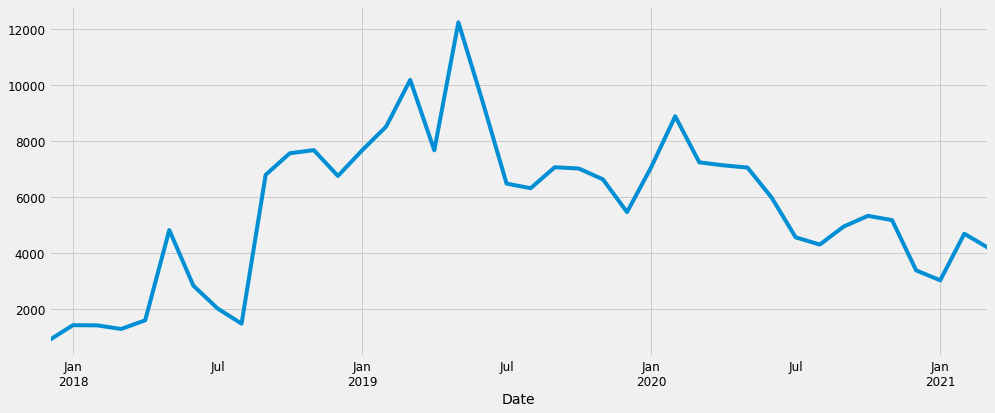

In [6]:
# Visualisoidaan aikasarjadataa keskiarvolla
y.plot(figsize=(15, 6))
plt.show()

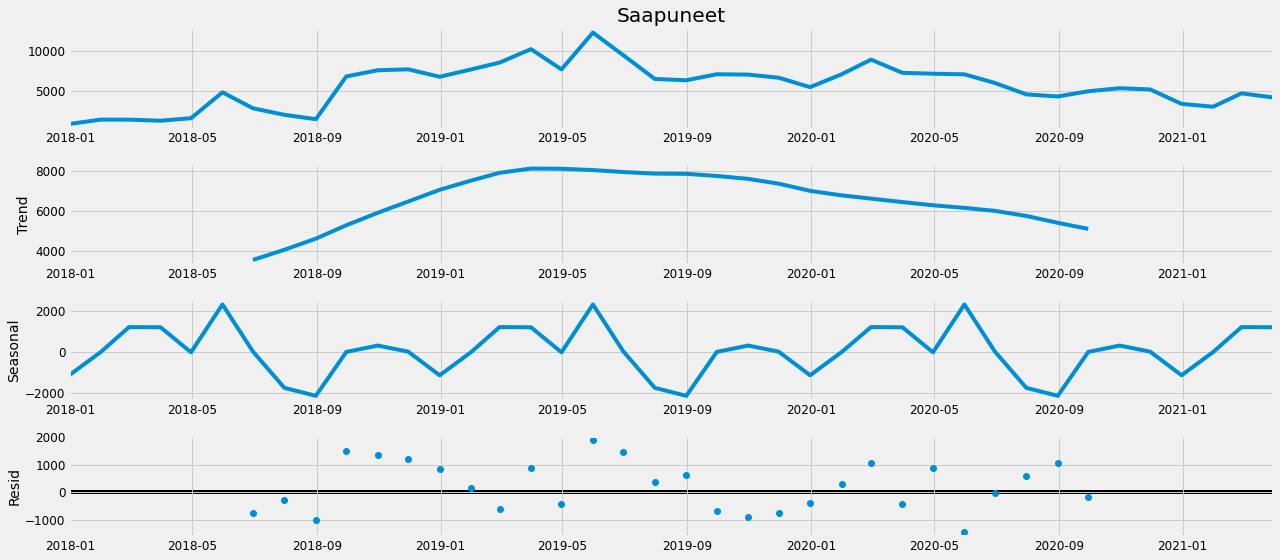

In [7]:
# Visualisoidaan trendi, kausittaisuus ja resid, syklisyys
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [8]:
# Luodaan ARIMA-malli Autoregressive Integrated Moving Average
# ARIMA(p, d, q) = seasonality, trend, noise in data
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in 
list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [9]:
# Etsitään sopivat parametrit Arima-mallille
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:794.7723450637579


C:\Users\Marko\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1131.4418075595208
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:528.4925031868585
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:284.31753916463873
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:549.147521665183
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:524.4021551648738
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:297.71402120247285
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:267.99635869997184
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:741.7837062219462
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2370.033309721458
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:492.94356327947105
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:252.93417682771403
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:528.7337006348897
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:489.38194632489405
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:293.7679580239725
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:251.97658683263765
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:676.7923428263593
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1154.8455302143043
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:467.9483017131705
AR

C:\Users\Marko\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:922.1253312987008
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:467.88733990281065
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:246.82735917241257
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:475.216366451143
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:455.6145049539799
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:269.26401548275203
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:248.73806580796835
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:677.5258712236553


C:\Users\Marko\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:961.1282630553015
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:466.7812366751448
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:244.85842432000481
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:454.4672328011786
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:456.01256351590865
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:250.0048941972167
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:246.81405202411824
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:661.1822232863705


C:\Users\Marko\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:2037.533006189745
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:451.50065566076233
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:229.01955641327714
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:456.45587680358096
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:441.0953814262198
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:252.00385668912472
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:230.94974627781386


In [10]:
# Yllä oleva viitteen, että ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:227.16138472882736.
# Sovitetaan Arima-mallia
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4693      0.675     -0.695      0.487      -1.793       0.855
ma.L1          0.2029      0.799      0.254      0.800      -1.363       1.769
ma.S.L12      -1.0000      0.331     -3.017      0.003      -1.650      -0.350
sigma2      1.431e+06   2.32e-07   6.18e+12      0.000    1.43e+06    1.43e+06


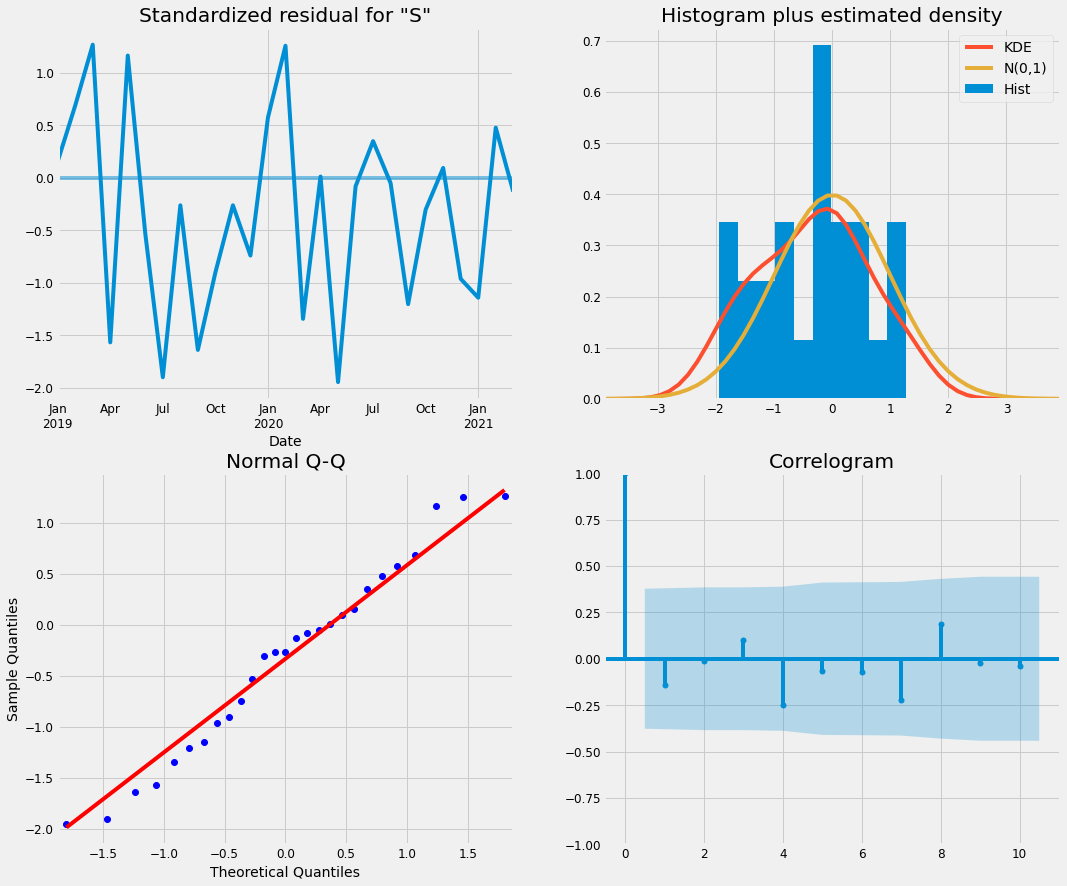

In [11]:
# Plotataan
# Normaalijakauma
results.plot_diagnostics(figsize=(16, 14))
plt.show()

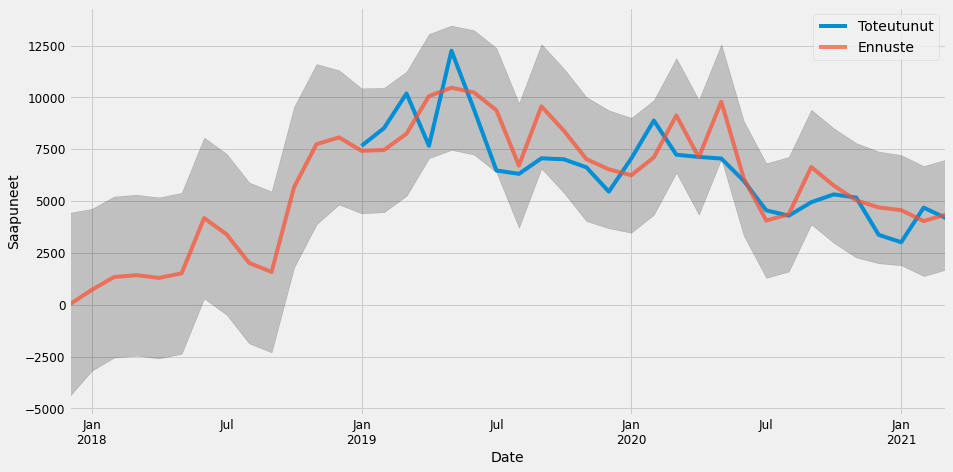

In [12]:
# Validoidaan ennusteet
# Line plot näyttää havainnot verrattuna liukuviin ennusteisiin. Ennusteet ovat linjassa oikeiden arvojen kanssa.
# Trendi nouseva alkuvuonna ja kausittainen loppuvuonna.
pred = results.get_prediction(start=pd.to_datetime('2017-12-31'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2019':].plot(label='Toteutunut')
pred.predicted_mean.plot(ax=ax, label='Ennuste', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Saapuneet')
plt.legend()
plt.show()

In [13]:
# The smaller the MSE, the closer we are to finding the line of best fit.
y_forecasted = pred.predicted_mean
y_truth = y['2017-12-10':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 2604492.48


In [14]:
# Root Mean Square Error (RMSE) kertoo, että malli ennustaa 1613:n sisällä. 
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 1613.84


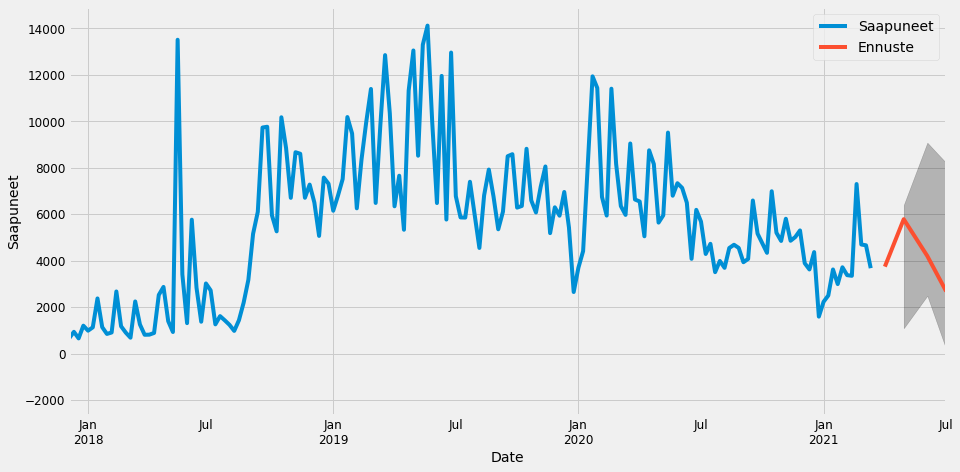

In [15]:
# Arima-malli näyttää kausittaisuuden. Jos ennustus ulottuu kauas tulevaisuuteen, on luontevaa, että luotettavuusrajat kasvavat.
# Producing and visualizing forecasts
pred_uc = results.get_forecast(steps=4)
pred_ci = pred_uc.conf_int()
ax = df.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Ennuste')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Saapuneet')
plt.legend()
plt.show()